In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
unemployment = pd.read_csv('registrert-arbeidsledighet.csv')
unemployment.head()

,År,Ident,Navn,Indikator,parameter,Variabel
0,2012,1,01 Buøy,"Registrert arbeidsledighet, 15-74 år",(% av befolkningen),"1,55"
1,2012,2,02 Badedammen,"Registrert arbeidsledighet, 15-74 år",(% av befolkningen),"1,75"
2,2012,3,03 Sentrum,"Registrert arbeidsledighet, 15-74 år",(% av befolkningen),"1,38"
3,2012,4,04 Bergeland,"Registrert arbeidsledighet, 15-74 år",(% av befolkningen),"1,68"
4,2012,5,05 Nylund,"Registrert arbeidsledighet, 15-74 år",(% av befolkningen),"1,53"


In [3]:
# Choosing records for 2014 and 2016
unemployment = unemployment.loc[unemployment['År'].isin([2014, 2016])]

In [4]:
# Percentage column is of dtype - object. In order to change the type to float we need to replace
# commas with dots.
unemployment['Variabel'] = unemployment['Variabel'].str.replace(',', '.')

In [5]:
# Cleaning names of the districts, so that the same district is of the same format at all years.
unemployment['Navn'] = unemployment['Navn'].str.replace(r'\d+','').str.replace(' ','')

In [6]:
# Checking if the dataset looks right.
unemployment.head()

,År,Ident,Navn,Indikator,parameter,Variabel
69,2014,1,Buøy,"Registrert arbeidsledighet, 15-74 år",(% av befolkningen),1.5
70,2014,2,Badedammen,"Registrert arbeidsledighet, 15-74 år",(% av befolkningen),2
71,2014,3,Sentrum,"Registrert arbeidsledighet, 15-74 år",(% av befolkningen),1.8
72,2014,4,Bergeland,"Registrert arbeidsledighet, 15-74 år",(% av befolkningen),2.4
73,2014,5,Nylund,"Registrert arbeidsledighet, 15-74 år",(% av befolkningen),1.9


In [7]:
# Choosing districts we want to explore
districts = ['Kannik', 'Bjergsted', 'Hundvågkrossen', 'Gausel', 'Jåttåvågen', 'Lervig', 'Stokka', 'Solborg',
            'Byhaugen', 'Buøy']
unemployment = unemployment.loc[unemployment['Navn'].isin(districts)] 

In [8]:
# Converting column with percentage values to float
convert_dict = {'Variabel': float}
unemployment = unemployment.astype(convert_dict)

In [9]:
# Checking that the datatypes are correct
unemployment.dtypes

År             int64
Ident          int64
Navn          object
Indikator     object
parameter     object
Variabel     float64
dtype: object

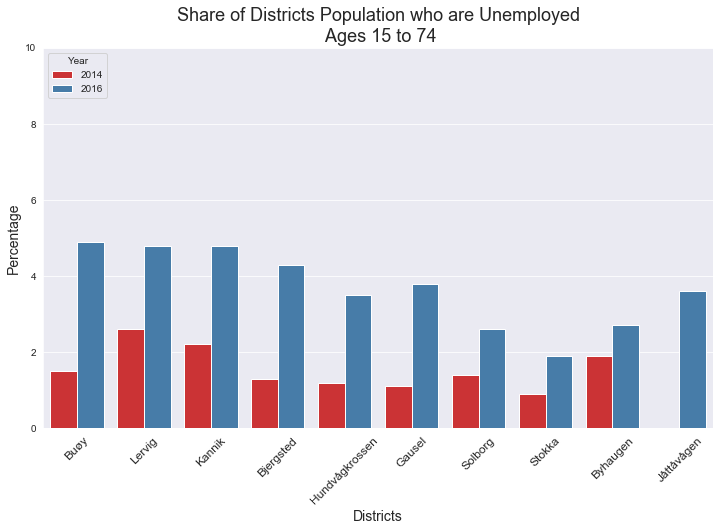

In [10]:
# Visualizing differences in unemployment for population in chosen districts
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.barplot(x="Navn", y="Variabel", hue="År", palette='Set1', data=unemployment)

plt.title("Share of Districts Population who are Unemployed\n Ages 15 to 74", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize='large')
ax.set_xlabel('Districts', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set(ylim=(0, 10))
ax.legend(title="Year")

figure = ax.get_figure()
#figure.savefig("unemployed.png")

The graph clearly shows how the Oil Crisis of 2016 influenced unemployment rates in the region. It would have been interesting to see how/if it has improved the last 4 years. Unfortunately,
as of today(03/07/2020), Stavanger municipality does not have more current data on their Open Data portal. I am going to try and find more updated statistics to fit into the graph on a later occasion. 